<a href="https://colab.research.google.com/github/ucheokechukwu/Active-Learning-on-the-Titanic/blob/main/Pytorch_For_Deep_Learning/04_Pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

https://www.learnpytorch.io/04_pytorch_custom_datasets/

https://github.com/mrdbourke/pytorch-deep-learning/tree/main

- getting custom datasets
- transforming data
- exploratory data analysis
- loading custom data with prebuilt and custom functions
- build the FoodVision Models
- compare models with./without data augmentation
- make predictions

# import libraries and set up device-agnostic code

In [1]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Getting the data



dataset is a subset of Food101 dataset.

Food101 has 101 different classes of food and 1000 images per class (750 training and 250 testing).

our dataset has 3 classes of food and 10% of images (~75 training and ~25 testing)



In [2]:
import requests
import zipfile
from pathlib import Path

# set up path to the data folder
data_path = Path('data')
image_path = data_path / 'pizza_steak_sushi'

# if the image folder doesn't exist, download it and prepare it...

if image_path.is_dir():
    print(f'{image_path} directory already exists... skipping download....')
else:
    print(f'{image_path} directory does not exist... creating... ')
    image_path.mkdir(parents=True, exist_ok=True)

data/pizza_steak_sushi directory does not exist... creating... 


In [6]:
# download pizza, steak and sushi data from github
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('Downloading pizza, steak, sushi data...')
    f.write(request.content)

# unzip data
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
    print('unzipping pizza, steak, sushi data')
    zip_ref.extractall(image_path)


unzipping pizza, steak, sushi data


# Exploring and preparing the data

In [21]:
import os
def walk_through_dir(dir_path):
    """walks through the dir_path returning its contents"""
    for dirpath, dirname, filenames in os.walk(dir_path):
        print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

In [22]:
next(os.walk('sample_data'))

('sample_data',
 [],
 ['anscombe.json',
  'README.md',
  'california_housing_train.csv',
  'california_housing_test.csv',
  'mnist_train_small.csv',
  'mnist_test.csv'])

In [24]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak


* this is the standard image classification directory structure. put the images of the same class inside on directory named with the class name

* this is based on https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html

In [25]:
# set up training and testing path
train_dir = image_path /'train'
test_dir = image_path /'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Visualizing the images

1. get all the image paths
2. pick a random image path using `random.choice()`
3. get an image class name using `pathlib.Path.parent.stem`
4. open the image with Python Pillow (PIL)
5. show the image and print metadata

### visualizing with `PIL.Image()`

In [27]:
image_path, type((image_path.glob("")))

(PosixPath('data/pizza_steak_sushi'), generator)

In [ ]:
import random
from PIL import Image

# 1. get all the image paths note the format passed to glob
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list


Random image path: data/pizza_steak_sushi/test/sushi/858157.jpg
Image class: sushi
Image height: 288
Image width: 512


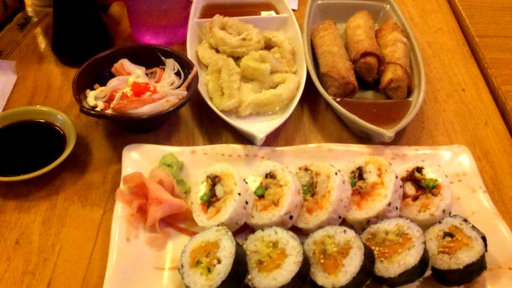

In [57]:
# 2. pick a random image path
# set seed
# random.seed(42)
random_image_path = random.choice(image_path_list)

# 3. get the image clas
image_class = random_image_path.parent.stem

# 4. open the image with PIL
img = Image.open(random_image_path)

# 5. print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
display(img)

### visualizing with matplotlib

(-0.5, 511.5, 287.5, -0.5)

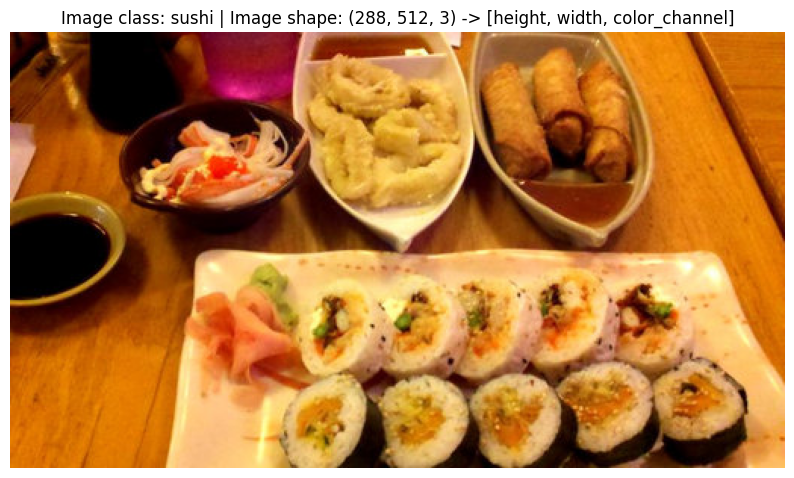

In [58]:
import numpy as np
import matplotlib.pyplot as plt
# turn the image into an array
img_as_array = np.asarray(img)
# plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channel]')
plt.axis(False)

In [60]:
img.size, img_as_array

((512, 288),
 array([[[ 86,  18,   5],
         [ 76,  14,   3],
         [ 57,   7,   0],
         ...,
         [214, 114,   0],
         [219, 115,   2],
         [220, 114,   2]],
 
        [[ 79,  13,   0],
         [ 69,   9,   0],
         [ 52,   3,   0],
         ...,
         [213, 112,   4],
         [215, 113,   5],
         [213, 111,   3]],
 
        [[ 76,  14,   0],
         [ 68,  10,   0],
         [ 51,   4,   0],
         ...,
         [210, 112,   5],
         [211, 110,   6],
         [209, 108,   4]],
 
        ...,
 
        [[221, 121,   1],
         [227, 124,   3],
         [225, 122,   1],
         ...,
         [253, 190,  97],
         [253, 190,  95],
         [253, 190,  93]],
 
        [[224, 124,   2],
         [230, 128,   4],
         [227, 125,   1],
         ...,
         [253, 192,  99],
         [253, 193,  95],
         [253, 194,  94]],
 
        [[223, 123,   0],
         [229, 127,   3],
         [226, 124,   0],
         ...,
         [254, 

## Transforming data with `torchvision.transforms`

Before we can use our image data with Pytorch:
1. turn target data into tensors
2. turn into a `torch.utils.data.Dataset`
3. turn into a `torch.utils.data.DataLoader`

In [61]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [63]:
# write a transform for image
data_transform = transforms.Compose( # or nn.Sequential()
    [
        # resize our images to 64x64
        transforms.Resize(size=(64,64)),
        # flip the images randomly on horizontal (adding diversity to th edata)
        transforms.RandomHorizontalFlip(p=0.5),
        # turn the image into a torch tensor
        transforms.ToTensor(),
    ]
)

In [65]:
data_transform(img), data_transform(img).shape, data_transform(img).dtype

(tensor([[[0.2000, 0.2431, 0.1804,  ..., 0.8353, 0.8275, 0.8196],
          [0.1608, 0.1804, 0.1373,  ..., 0.8157, 0.8078, 0.7961],
          [0.1882, 0.1137, 0.1608,  ..., 0.8118, 0.8039, 0.7961],
          ...,
          [0.8667, 0.8745, 0.8588,  ..., 0.8745, 0.9216, 0.9725],
          [0.8667, 0.8706, 0.8510,  ..., 0.9059, 0.9569, 0.9922],
          [0.8745, 0.8667, 0.8588,  ..., 0.9529, 0.9882, 0.9922]],
 
         [[0.0353, 0.0314, 0.0431,  ..., 0.4392, 0.4392, 0.4392],
          [0.0275, 0.0118, 0.0314,  ..., 0.4196, 0.4157, 0.4078],
          [0.0275, 0.0039, 0.0510,  ..., 0.4157, 0.4078, 0.4039],
          ...,
          [0.4510, 0.4588, 0.4392,  ..., 0.5490, 0.6118, 0.6706],
          [0.4549, 0.4510, 0.4314,  ..., 0.6039, 0.6706, 0.7098],
          [0.4667, 0.4510, 0.4392,  ..., 0.6863, 0.7176, 0.7412]],
 
         [[0.0078, 0.0078, 0.0078,  ..., 0.0196, 0.0039, 0.0078],
          [0.0078, 0.0078, 0.0078,  ..., 0.0118, 0.0078, 0.0118],
          [0.0078, 0.0039, 0.0118,  ...,

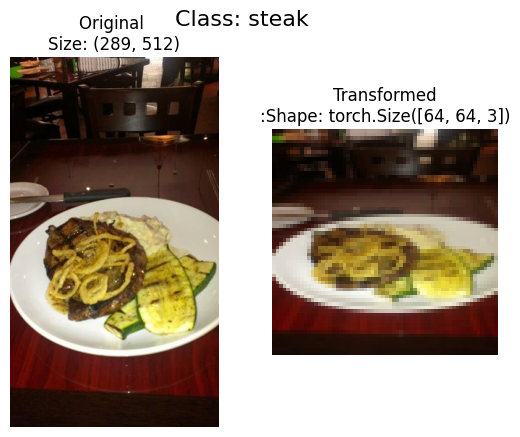

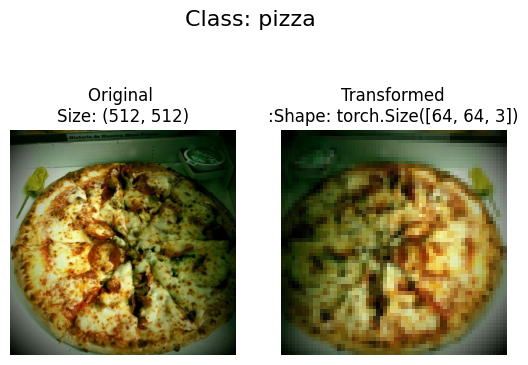

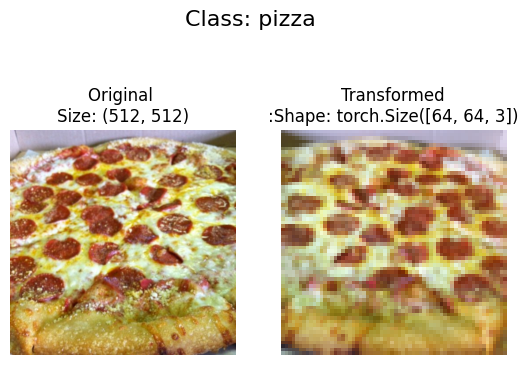

In [66]:
def plot_transformed_images(image_paths,
                            transform,
                            n=3,
                            seed=42):
    """select random images from a path of images and loads/transforms them
    then plots the original vs the transformed images"""

    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis(False)

            # transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # to put the color-channels last
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\n:Shape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

### Option 1: Loading image data using `ImageFolder`

https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html

- this is a prebuilt dataset function.

In [69]:
# Use ImageFolder to create datasets

from torchvision import datasets
train_data = datasets.ImageFolder(
    root = train_dir,
    transform = data_transform, # a transform for the data
    target_transform = None # a transform for the label
)
test_data = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [70]:
## checking out the attributes of the

# get class names as a list
class_names = train_data.classes
print(f"Class names as a list: {class_names}")
# get class names as a dict
class_dict = train_data.class_to_idx
print(f"Class names as a dictionary: {class_dict}")
# check the lengths of our dataset
print(f"Length of train data: {len(train_data)}. \tLength of test data: {len(test_data)}")

train_data.samples[0]


Class names as a list: ['pizza', 'steak', 'sushi']
Class names as a dictionary: {'pizza': 0, 'steak': 1, 'sushi': 2}
Length of train data: 225. 	Length of test data: 75


('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [73]:
train_data[224]

(tensor([[[0.2941, 0.2824, 0.2314,  ..., 0.0039, 0.0039, 0.0078],
          [0.3490, 0.3020, 0.2549,  ..., 0.0196, 0.0196, 0.0235],
          [0.8353, 0.7451, 0.6196,  ..., 0.0392, 0.0353, 0.0392],
          ...,
          [0.0941, 0.0941, 0.0980,  ..., 0.8588, 0.8588, 0.8549],
          [0.0941, 0.0941, 0.0941,  ..., 0.8588, 0.8588, 0.8588],
          [0.0980, 0.0941, 0.0980,  ..., 0.8549, 0.8549, 0.8471]],
 
         [[0.2431, 0.2314, 0.1882,  ..., 0.0235, 0.0235, 0.0275],
          [0.3137, 0.2588, 0.2118,  ..., 0.0353, 0.0353, 0.0392],
          [0.8431, 0.7451, 0.6039,  ..., 0.0471, 0.0471, 0.0471],
          ...,
          [0.0941, 0.0941, 0.0980,  ..., 0.8275, 0.8275, 0.8314],
          [0.0941, 0.0941, 0.0941,  ..., 0.8275, 0.8275, 0.8275],
          [0.0980, 0.0941, 0.0980,  ..., 0.8235, 0.8196, 0.8157]],
 
         [[0.1529, 0.1412, 0.1255,  ..., 0.0078, 0.0078, 0.0118],
          [0.2392, 0.1882, 0.1529,  ..., 0.0196, 0.0196, 0.0275],
          [0.8118, 0.7137, 0.5686,  ...,

#### Visualizing

In [78]:
type(train_data)

torchvision.datasets.folder.ImageFolder

In [79]:
img, label = train_data[0]
print(f"Image tensor: \n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: class_names[label]")
print(f"Image label dataype: {type(label)}")

Image tensor: 
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color channel]


Text(0.5, 1.0, 'pizza')

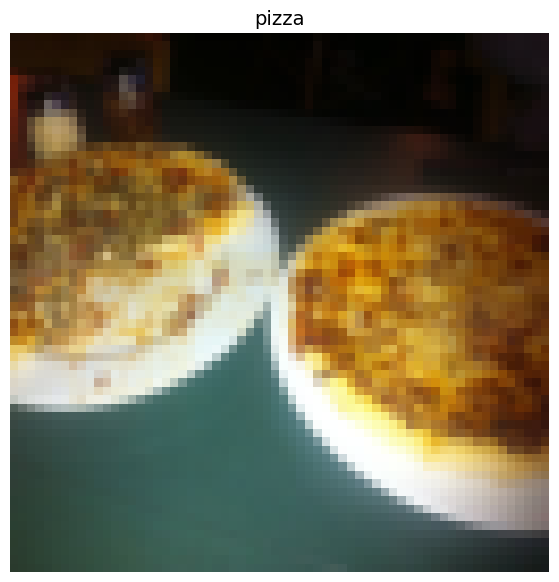

In [80]:
# rearranging hte dimensions
img_permute = img.permute(1,2,0)

# print out different shapes
print(f"Original shape: {img.shape} -> [color channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color channel]")

# plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14)

#### Turn images into Dataloaders

A `Dataloader` will help us turn our datasets into iterables, and we can customize the batch size.

In [86]:
import os
os.cpu_count()

2

In [88]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True,
                              num_workers=os.cpu_count())

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = os.cpu_count())
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78486bad9120>,
 <torch.utils.data.dataloader.DataLoader at 0x78486bada590>)

In [90]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [102]:
type(train_data), type(train_dataloader)

(torchvision.datasets.folder.ImageFolder,
 torch.utils.data.dataloader.DataLoader)

In [109]:
batch_sample = next(iter(train_dataloader))
batch_imgs, batch_labels = batch_sample
display(len(batch_imgs), len(batch_labels))
print(f"image shape: {batch_imgs.shape}")
print(f"label_shape: {batch_labels.shape}")

32

32

image shape: torch.Size([32, 3, 64, 64])
label_shape: torch.Size([32])


### Option 2: Loading data with custom `Dataset`

- what if the prebuilt ImageFolder did not exist?
- we need to create our own dataloading class...

Should be able to:
1. load images from file
2. get class names from the Dataset
3. get classes as a Dict

Pros:
1. can create a Dataset out of almost anything
2. not limited to the prebuilt functions

Cons:
1. it might not work
2. writing more code (with bugs)


In [111]:
import os
import pathlib
import torch
from PIL import Image

from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List